# eCommerce Predict Repurchase 

In this project, I utilized data from an eCommerce platform __[link](https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b)__ to predict repurchase. The project comprises four main parts:

Part 1 - Data Exploration: This involves visualization and quality checks of the data.

Part 2 - ETL (Extract, Transform, Load): Tasks include creating a Postgres database, feature engineering, and loading data for modeling in SQL.

Part 3 - Data Preprocessing and Modeling: Utilizing techniques such as XGBoost and Random Forest to preprocess the data and build predictive models.

Part 4 - Business Recommendations: Providing actionable insights and recommendations based on the analysis and modeling results.




# Part 3


## 1. Data Preprocessing

In [6]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
model_data = pd.read_csv(r'C:\Users\shenl\OneDrive\Documents\eCommerce DS project\model_data.csv')
model_data = model_data.sort_values(by=['user_id', 'product_id']) # there are duplicates
model_data = model_data.drop_duplicates()
model_data
#model_data_tableau = model_data.drop_duplicates()
#model_data_tableau.to_csv(r'C:\Users\shenl\OneDrive\Documents\eCommerce DS project\model_data_tableau.csv', index=False)

,user_id,product_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,target,user_num_orders,user_num_products,user_most_order_day,...,product_num_orders,product_num_users,product_most_order_day,product_most_order_hour,product_avg_days_since_prior_order,user_product_num_orders,user_product_avg_add_to_cart_order,user_product_avg_reorder,user_product_most_order_day,user_product_most_order_hour
242108,50,1202,54,6,10,3.0,0,67,453,1,...,91,42,0,12,11.333333,1,11.0,0.0,6,10
714636,50,2132,30,3,12,7.0,0,67,453,1,...,37,12,1,13,15.342857,1,2.0,0.0,3,12
567087,50,2643,2,6,12,10.0,0,67,453,1,...,24,13,0,14,8.600000,1,4.0,0.0,6,12
737892,50,4601,9,4,11,5.0,0,67,453,1,...,9,7,0,14,11.000000,1,10.0,0.0,4,11
556841,50,4656,11,6,9,4.0,0,67,453,1,...,194,124,1,14,12.513661,1,6.0,0.0,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419903,206175,44661,2,6,21,7.0,0,6,49,0,...,169,92,1,9,10.729032,1,5.0,0.0,6,21
323765,206175,45007,1,6,17,NaN,1,6,49,0,...,2474,779,0,11,10.454661,1,3.0,0.0,6,17
708296,206175,46802,1,6,17,NaN,0,6,49,0,...,541,251,0,11,12.222892,1,9.0,0.0,6,17
174769,206175,47144,1,6,17,NaN,0,6,49,0,...,824,257,1,11,11.948617,1,6.0,0.0,6,17


In [7]:
# join products and department table for more variables
departments = pd.read_csv(r'C:\Users\shenl\OneDrive\Documents\eCommerce DS project\departments.csv')
products = pd.read_csv(r'C:\Users\shenl\OneDrive\Documents\eCommerce DS project\products.csv')

# join products and departments to get more information
model_data = model_data.merge(products, on = 'product_id')
model_data = model_data.drop(columns=['product_name'])

model_data = model_data.merge(departments, on = 'department_id')
model_data_department_product = model_data.merge(departments, on = 'department_id')
model_data_department_product.to_csv(r'C:\Users\shenl\OneDrive\Documents\eCommerce DS project\model_data_department_product.csv', index=False)

### 1.1.1 column names

In [9]:
model_data.columns

Index(['user_id', 'product_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'target',
       'user_num_orders', 'user_num_products', 'user_most_order_day',
       'user_most_order_hour', 'user_avg_days_since_prior_order',
       'product_num_orders', 'product_num_users', 'product_most_order_day',
       'product_most_order_hour', 'product_avg_days_since_prior_order',
       'user_product_num_orders', 'user_product_avg_add_to_cart_order',
       'user_product_avg_reorder', 'user_product_most_order_day',
       'user_product_most_order_hour', 'aisle_id', 'department_id',
       'department'],
      dtype='object')

### 1.1.2 variables type

In [10]:
model_data.info() # model_data is for xgboost model
model_data_r = model_data.drop(columns=['department']) # model_data_r is for random forest model
model_data_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793924 entries, 0 to 793923
Data columns (total 24 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   user_id                             793924 non-null  int64  
 1   product_id                          793924 non-null  int64  
 2   order_number                        793924 non-null  int64  
 3   order_dow                           793924 non-null  int64  
 4   order_hour_of_day                   793924 non-null  int64  
 5   days_since_prior_order              742704 non-null  float64
 6   target                              793924 non-null  int64  
 7   user_num_orders                     793924 non-null  int64  
 8   user_num_products                   793924 non-null  int64  
 9   user_most_order_day                 793924 non-null  int64  
 10  user_most_order_hour                793924 non-null  int64  
 11  user_avg_days_since_prior_

### 1.1.3 check null and fill in null

In [ ]:
# total 21 variables with 1 target variable
model_data.isna().sum()
# days_since_prior_order & product_avg_days_since_prior_order - fill null with 0
model_data['days_since_prior_order'].fillna(0, inplace=True)
model_data['product_avg_days_since_prior_order'].fillna(0, inplace=True)

#for i in model_data.columns:
#  if model_data[i].isna().any():
#    median = model_data[i].median()
#    model_data[i].fillna(median, inplace=True)

In [ ]:
model_data.isna().sum()

In [5]:
model_data.info()
# department is character, the rests are all numeric

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793924 entries, 0 to 793923
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   user_id                             793924 non-null  int64  
 1   product_id                          793924 non-null  int64  
 2   order_number                        793924 non-null  int64  
 3   order_dow                           793924 non-null  int64  
 4   order_hour_of_day                   793924 non-null  int64  
 5   days_since_prior_order              793924 non-null  float64
 6   target                              793924 non-null  int64  
 7   user_num_orders                     793924 non-null  int64  
 8   user_num_products                   793924 non-null  int64  
 9   user_most_order_day                 793924 non-null  int64  
 10  user_most_order_hour                793924 non-null  int64  
 11  user_avg_days_since_prior_

### 1.1.4 unique values

In [6]:
model_data.nunique()

user_id                                5000
product_id                            28927
order_number                             99
order_dow                                 7
order_hour_of_day                        24
days_since_prior_order                   31
target                                    2
user_num_orders                          95
user_num_products                       704
user_most_order_day                       7
user_most_order_hour                     24
user_avg_days_since_prior_order        4284
product_num_orders                      575
product_num_users                       333
product_most_order_day                    7
product_most_order_hour                  24
product_avg_days_since_prior_order     5494
user_product_num_orders                  81
user_product_avg_add_to_cart_order     3355
user_product_avg_reorder                 81
user_product_most_order_day               7
user_product_most_order_hour             24
aisle_id                        

### 1.1.5 summary statistics

In [7]:
model_data.describe() # summary statistics

,user_id,product_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,target,user_num_orders,user_num_products,user_most_order_day,...,product_most_order_day,product_most_order_hour,product_avg_days_since_prior_order,user_product_num_orders,user_product_avg_add_to_cart_order,user_product_avg_reorder,user_product_most_order_day,user_product_most_order_hour,aisle_id,department_id
count,793924.000000,793924.000000,793924.000000,793924.000000,793924.000000,793924.000000,793924.000000,793924.000000,793924.000000,793924.000000,...,793924.000000,793924.000000,793924.000000,793924.000000,793924.000000,793924.000000,793924.000000,793924.000000,793924.000000,793924.000000
mean,102180.883412,25497.613444,16.774994,2.742582,13.412193,10.566688,0.202736,32.408403,421.376983,2.437975,...,1.099620,12.339265,11.310610,7.330404,8.440458,0.584587,2.167734,12.127889,71.279935,9.924670
std,59026.239601,14105.990241,17.378097,2.103612,4.223539,8.995835,0.402038,25.112406,397.154566,2.200623,...,1.775143,2.626828,2.549532,9.481723,6.021921,0.364503,2.071897,4.083741,38.125068,6.277558
min,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,50743.000000,13389.000000,5.000000,1.000000,10.000000,4.000000,0.000000,13.000000,146.000000,0.000000,...,0.000000,10.000000,10.125683,2.000000,4.285714,0.500000,0.000000,9.000000,31.000000,4.000000
50%,102957.000000,25069.000000,11.000000,3.000000,13.000000,7.000000,0.000000,26.000000,303.000000,2.000000,...,0.000000,12.000000,11.132075,4.000000,7.000000,0.750000,1.000000,12.000000,83.000000,9.000000
75%,152215.000000,37766.000000,23.000000,5.000000,16.000000,14.000000,0.000000,44.000000,574.000000,5.000000,...,1.000000,14.000000,12.113402,9.000000,11.000000,0.888889,4.000000,15.000000,107.000000,16.000000
max,206175.000000,49683.000000,99.000000,6.000000,23.000000,30.000000,1.000000,99.000000,3061.000000,6.000000,...,6.000000,23.000000,30.000000,86.000000,91.000000,0.988372,6.000000,23.000000,134.000000,21.000000


### 1.1.6 rare event 

In [30]:
target_check = model_data['target'].value_counts()
target_check[0] #number of 0s:297467
target_check[1] #number of 1s:32339
target_check[1]/(target_check[1] + target_check[0]) *100 #label rate:9.8%
# no need to oversampling

20.27360301489815


## 2 Modeling (XGBoost)

## 2.1 Preprocessing
### 2.1.1 convert numerical variables into categorical variables

In [8]:
# factor some numerical var into categorical var
columns_to_convert = ['order_dow', 'order_hour_of_day', 'user_most_order_day', 'user_most_order_hour',
                      'product_most_order_day', 'product_most_order_hour', 'user_product_most_order_day',
                      'user_product_most_order_hour', 'aisle_id', 'department_id', 'department', 'target']

for column in columns_to_convert:
    model_data[column] = pd.Categorical(model_data[column])
    
# model_data[columns_to_convert] = model_data[columns_to_convert].astype('category')
# cats = model_data.select_dtypes(exclude=np.number).columns.to_list()
# for col in cats:
#     df[col] = df[col].astype('category')

In [9]:
# one hot encoding - convert categorical into numerical var
# one hot - encoding increase the dimension - decide not to do it
# model_data_dummy = pd.get_dummies(model_data, columns = ['department_id'])

### 2.1.2 split data into train and test

In [11]:
# randomly select 20% users as test data (xgboost)
# remaining data will be train data.
test_user_ids = model_data['user_id'].drop_duplicates().sample(frac=0.2)

train_data = model_data[~model_data['user_id'].isin(test_user_ids)]
test_data = model_data[model_data['user_id'].isin(test_user_ids)]

# don't split like below because user_id can have multiple product_id
## split train and test
#train = model_data.sample(frac=0.7)
#  dropping the rows that are already present in the training
#test = model_data.drop(train.index)

In [12]:
model_data.shape #(329806, 25)
train_data.shape #(263754, 25)
test_data.shape #(66052, 25)

(154292, 25)

In [13]:
# create x_train, y_train, x_test, y_test
X_train, X_test = train_data.drop('target', axis=1), test_data.drop('target', axis=1)
Y_train, Y_test = train_data['target'], test_data['target']
X_df = model_data.drop('target', axis=1)
Y_df = model_data['target']

## 2.2 Build XGBoost model

### 2.2.1 Hyper Parameters Tuning

In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
# grid 1
param_grid = {
    'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'eta': [0.1, 0.15, 0.2, 0.25, 0.3],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'subsample': [0.25, 0.5, 0.75, 1]
}

In [24]:
# build xgboost & run grid search
xgb = XGBClassifier(enable_categorical=True)
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 10)

In [25]:
# optimal params
grid_search.fit(X_train, Y_train)
grid_search.best_params_
# {'eta': 0.15, 'max_depth': 1, 'n_estimators': 15, 'subsample': 0.25}

{'eta': 0.15, 'max_depth': 1, 'n_estimators': 15, 'subsample': 0.25}

In [ ]:
# grid 2
param_grid = {
    'n_estimators': [15],
    'eta': [0.15],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'subsample': [0.25]
}
# build xgboost & run grid search
xgb = XGBClassifier(enable_categorical=True)
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 10)
# optimal params
grid_search.fit(X_train, Y_train)
grid_search.best_params_
# {'eta': 0.15, 'max_depth': 1, 'n_estimators': 15, 'subsample': 0.25}

In [ ]:
# grid 2
param_grid = {
    'n_estimators': [4, 8, 15, 18],
    'eta': [0.11, 0.15, 0.17, 0.21],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'subsample': [0.15, 0.2, 0.25, 0.3]
}
# build xgboost & run grid search
xgb = XGBClassifier(enable_categorical=True)
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 10)
# optimal params
grid_search.fit(X_train, Y_train)
grid_search.best_params_
# {'eta': 0.15, 'max_depth': 1, 'n_estimators': 15, 'subsample': 0.25}

### 2.2.2 Final XGBoost model

In [15]:
# build final xgboost model
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 15,
                    subsample = 0.25,
                    max_depth=10,
                    eta=0.15,
                    random_state = 12345,
                    enable_categorical=True) #boosting 

xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eta=0.15, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=15,
              n_jobs=None, num_parallel_tree=None, ...)

## 2.3 Model Evaluation (XGBoost)

### 2.3.1 AUC on the Train Dataset

In [16]:
from sklearn.metrics import roc_curve, auc
y_train_pred_proba = xgb.predict_proba(X_train)[:, 1]

# Calculate the AUC score
fpr, tpr, thresholds = roc_curve(Y_train, y_train_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
# this does not seem right
print("AUC Score:", roc_auc)

AUC Score: 0.9126432879224381


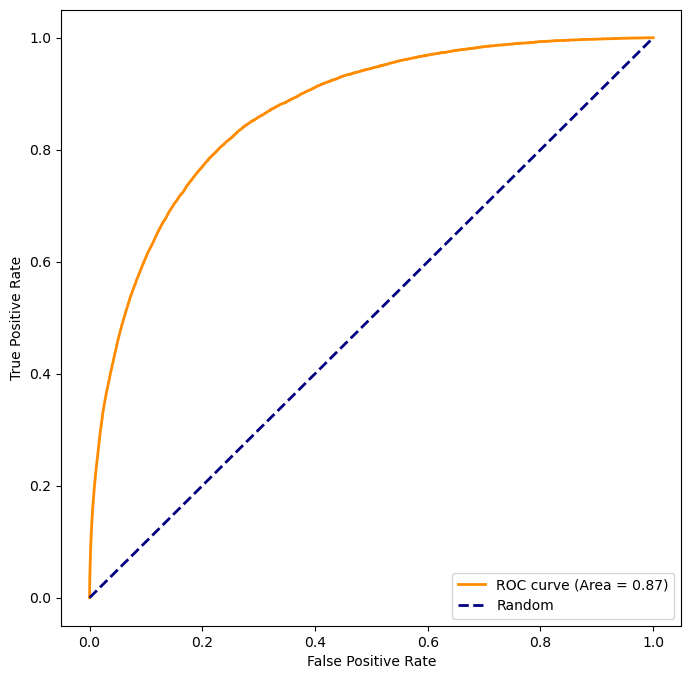

In [45]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (Area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 2.3.2 AUC on the Test Dataset

In [17]:
from sklearn.metrics import roc_curve, auc
y_test_pred_proba = xgb.predict_proba(X_test)[:, 1]

# Calculate the AUC score
fpr, tpr, thresholds = roc_curve(Y_test, y_test_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
# this does not seem right
print("AUC Score:", roc_auc)

AUC Score: 0.7824019313003948


## 2.4 Variable Importance from XGBoost Model

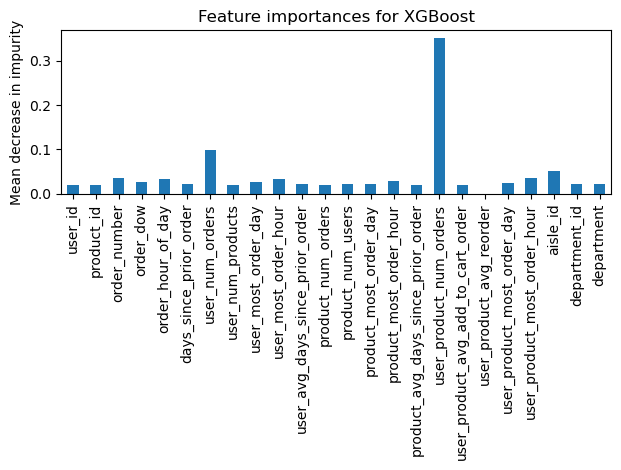

user_id                               0.019902
product_id                            0.019086
order_number                          0.036181
order_dow                             0.025530
order_hour_of_day                     0.033409
days_since_prior_order                0.022605
user_num_orders                       0.099260
user_num_products                     0.020481
user_most_order_day                   0.025934
user_most_order_hour                  0.033514
user_avg_days_since_prior_order       0.022602
product_num_orders                    0.020154
product_num_users                     0.021189
product_most_order_day                0.022825
product_most_order_hour               0.028327
product_avg_days_since_prior_order    0.019346
user_product_num_orders               0.351373
user_product_avg_add_to_cart_order    0.020687
user_product_avg_reorder              0.000000
user_product_most_order_day           0.025065
user_product_most_order_hour          0.036394
aisle_id     

In [59]:
xgb_importances = pd.Series(xgb.feature_importances_, index = xgb.feature_names_in_)

fig, ax = plt.subplots()
xgb_importances.plot.bar(ax = ax)
ax.set_title("Feature importances for XGBoost")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


plt.show()

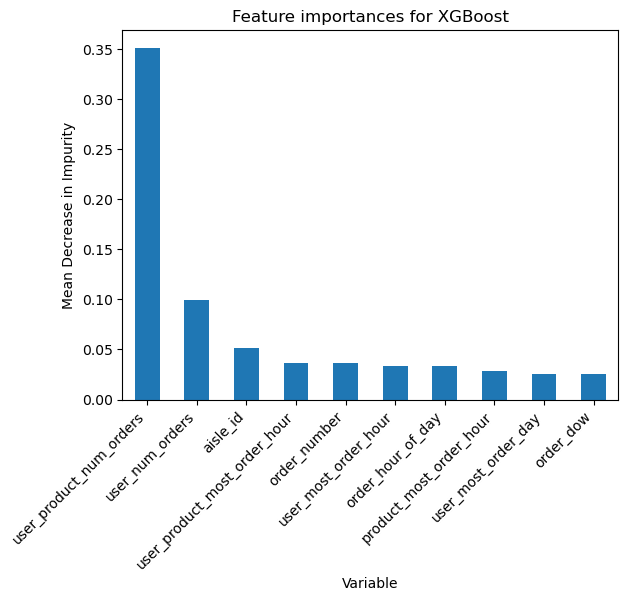

In [49]:
sub_xgb=xgb_importances.sort_values(ascending=False).head(n=10)

fig, ax = plt.subplots()
sub_xgb.plot.bar(ax = ax)
ax.set_title("Feature importances for XGBoost")
ax.set_ylabel("Mean Decrease in Impurity")
ax.set_xlabel("Variable")
#fig.tight_layout()
#custom_labels = ['','']
ax.set_xticklabels(sub_xgb.index, rotation=45, ha='right') # Adjust rotation and alignment 
plt.show()

In [50]:
sub_xgb
# total orders for each customer to buy certain product -user_product_num_orders  
# total orders for each customer - user_num_orders 
# aisle_id - aisle_id 
# for each customer to buy certain product, when is frequent purchase hour - user_product_most_order_hour
# nth time purchase - order_number 
# for each customer, when is freqent purchase hour - user_most_order_hour
# hour when purchase - order_hour_of_day 
# for each product, when is frequent purchase hour - product_most_order_hour
# for each customer, when is frequent purchase day - user_most_order_day 
# day of purchase -  order_dow 

user_product_num_orders         0.351373
user_num_orders                 0.099260
aisle_id                        0.051187
user_product_most_order_hour    0.036394
order_number                    0.036181
user_most_order_hour            0.033514
order_hour_of_day               0.033409
product_most_order_hour         0.028327
user_most_order_day             0.025934
order_dow                       0.025530
dtype: float32

In [60]:
sub_xgb_all=xgb_importances.sort_values(ascending=False)
sub_xgb_all

user_product_num_orders               0.351373
user_num_orders                       0.099260
aisle_id                              0.051187
user_product_most_order_hour          0.036394
order_number                          0.036181
user_most_order_hour                  0.033514
order_hour_of_day                     0.033409
product_most_order_hour               0.028327
user_most_order_day                   0.025934
order_dow                             0.025530
user_product_most_order_day           0.025065
department_id                         0.022850
product_most_order_day                0.022825
days_since_prior_order                0.022605
user_avg_days_since_prior_order       0.022602
department                            0.022100
product_num_users                     0.021189
user_product_avg_add_to_cart_order    0.020687
user_num_products                     0.020481
product_num_orders                    0.020154
user_id                               0.019902
product_avg_d

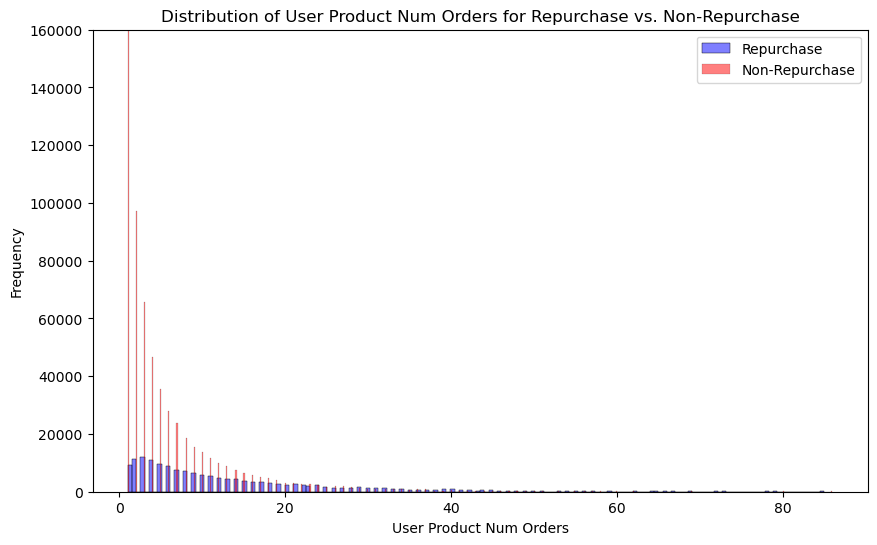

In [75]:
# Distributions are different among repurchase and non-repurchase customers
# Filter data for repurchase and non-repurchase instances
repurchase_data = model_data[model_data['target'] == 1]
non_repurchase_data = model_data[model_data['target'] == 0]

# Plot the distribution of user_product_num_orders
plt.figure(figsize=(10, 6))
sns.histplot(repurchase_data['user_product_num_orders'], color='blue', alpha=0.5, label='Repurchase')
sns.histplot(non_repurchase_data['user_product_num_orders'], color='red', alpha=0.5, label='Non-Repurchase')

# Set the y-axis limits
plt.ylim(0, 160000) 

# Add labels and title
plt.xlabel('User Product Num Orders')
plt.ylabel('Frequency')
plt.title('Distribution of User Product Num Orders for Repurchase vs. Non-Repurchase')
plt.legend()

# Show plot
plt.show()


## 3 Modeling (Random Forest)

## 3.1 Preprocessing 
### 3.1.1 fill in null & one-hot encode categorical into numerical (for random forest model)

In [18]:
# fill in null for random forest dataset

# days_since_prior_order & product_avg_days_since_prior_order - fill null with 0
model_data_r['days_since_prior_order'].fillna(0, inplace=True)
model_data_r['product_avg_days_since_prior_order'].fillna(0, inplace=True)

# if I one-hot encode 'department', I will create too many new columns due to 21 unique levels. Therefore I did not incluce this variable for random forest model.

### 3.1.2 split data in train and test

In [ ]:
# randomly select 20% users as test data (random forest)
# remaining data will be train data.
test_user_ids_r = model_data_r['user_id'].drop_duplicates().sample(frac=0.2)

train_data_r = model_data_r[~model_data_r['user_id'].isin(test_user_ids_r)]
test_data_r = model_data_r[model_data_r['user_id'].isin(test_user_ids_r)]

model_data_r.shape #(329806, 24)
train_data_r.shape #(263754, 24)
test_data_r.shape #(66052, 24)

# create x_train, y_train, x_test, y_test
X_train_r, X_test_r = train_data_r.drop('target', axis=1), test_data_r.drop('target', axis=1)
Y_train_r, Y_test_r = train_data_r['target'], test_data_r['target']
X_df_r = model_data_r.drop('target', axis=1)
Y_df_r = model_data_r['target']

## 3.2 Build Random Forest model

### 3.2.1 Hyper Parameters Tuning

In [18]:
from sklearn.model_selection import GridSearchCV

#tuning parameters
param_grid = {
    "bootstrap": [True],
    "max_features": [3,4,5],
    "n_estimators": [100,200,300]}

#fit model with grid search
rf = RandomForestClassifier(random_state = 2727)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid)
grid_search.fit(X_train_r, Y_train_r)

#find best parameters
grid_search.best_params_
# {'bootstrap': True, 'max_features': 3, 'n_estimators': 100}

{'bootstrap': True, 'max_features': 3, 'n_estimators': 100}

### 3.2.2 Final Random model

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100,
                            max_features=3,
                            random_state = 2727,
                            oob_score = True,
                            max_depth = 10,
                            min_samples_split = 10)

rf.fit(X_train_r, Y_train_r)



RandomForestClassifier(max_depth=10, max_features=3, min_samples_split=10,
                       oob_score=True, random_state=2727)

## 3.3 Model Evaluation (Random Forest)

### 3.3.1 AUC on the Train Dataset

In [25]:
from sklearn.metrics import roc_curve, auc
y_train_pred_proba_rf = rf.predict_proba(X_train_r)[:, 1]

# Calculate the AUC score
fpr, tpr, thresholds = roc_curve(Y_train_r, y_train_pred_proba_rf)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
# this does not seem right
print("AUC Score:", roc_auc) # 0.84

AUC Score: 0.8435842754673384


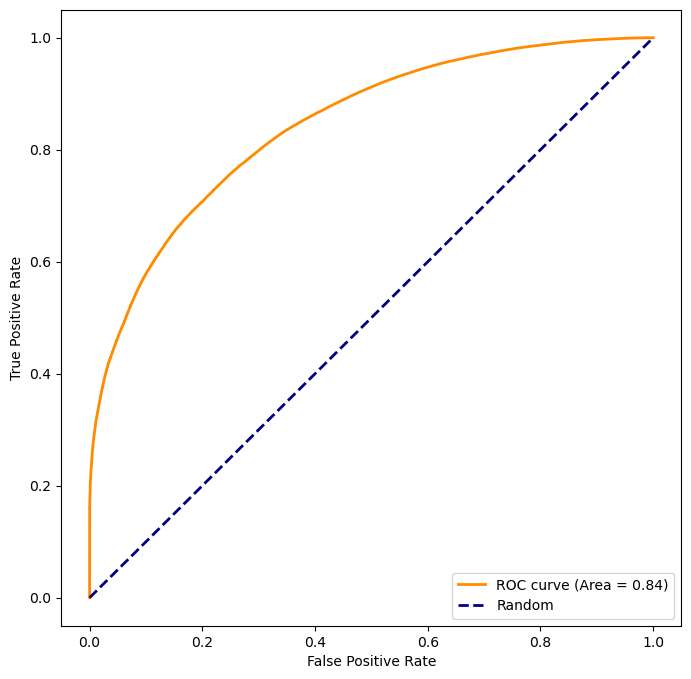

In [26]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (Area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 3.3.2 AUC on the Test Dataset

In [28]:
from sklearn.metrics import roc_curve, auc
y_test_pred_proba_rf = rf.predict_proba(X_test_r)[:, 1]

# Calculate the AUC score
fpr, tpr, thresholds = roc_curve(Y_test_r, y_test_pred_proba_rf)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
# this does not seem right
print("AUC Score:", roc_auc) #0.79

AUC Score: 0.7920531043586007


## 3.4 Variable Importance from Random Forest Model

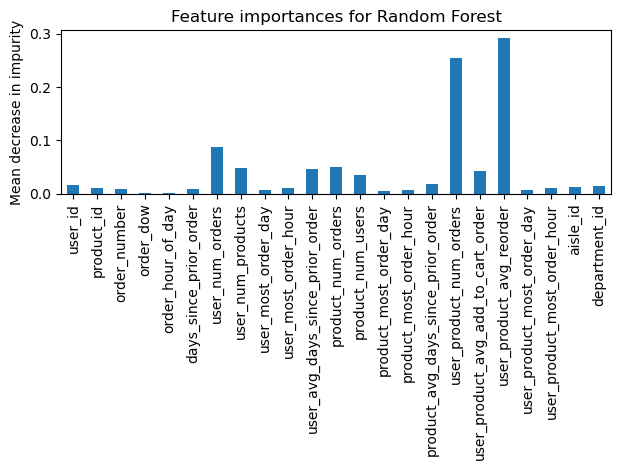

In [33]:
rf_importances = pd.Series(rf.feature_importances_, index = rf.feature_names_in_)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax = ax)
ax.set_title("Feature importances for Random Forest")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


plt.show()

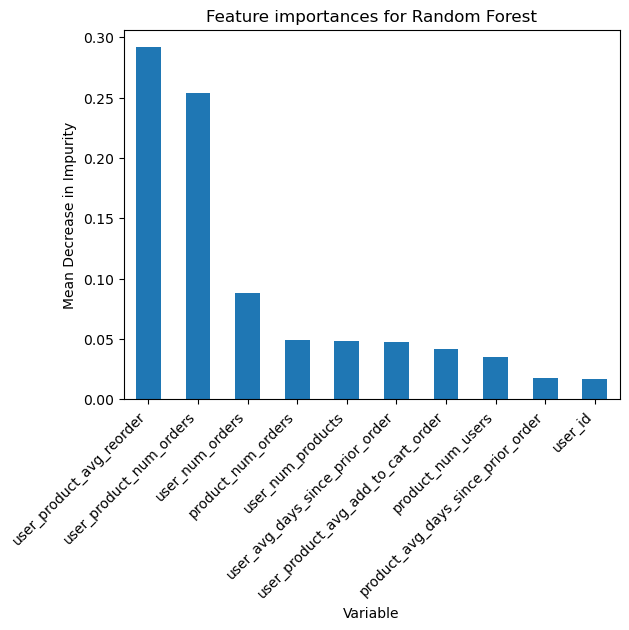

In [35]:
sub_rf=rf_importances.sort_values(ascending=False).head(n=10)

fig, ax = plt.subplots()
sub_rf.plot.bar(ax = ax)
ax.set_title("Feature importances for Random Forest")
ax.set_ylabel("Mean Decrease in Impurity")
ax.set_xlabel("Variable")
#fig.tight_layout()
#custom_labels = ['','']
ax.set_xticklabels(sub_rf.index, rotation=45, ha='right') # Adjust rotation and alignment 
plt.show()

In [36]:
sub_rf
# total orders for each customer to buy certain product -user_product_num_orders  
# total orders for each customer - user_num_orders 
# aisle_id - aisle_id 
# for each customer to buy certain product, when is frequent purchase hour - user_product_most_order_hour
# nth time purchase - order_number 
# for each customer, when is freqent purchase hour - user_most_order_hour
# hour when purchase - order_hour_of_day 
# for each product, when is frequent purchase hour - product_most_order_hour
# for each customer, when is frequent purchase day - user_most_order_day 
# day of purchase -  order_dow 

user_product_avg_reorder              0.291645
user_product_num_orders               0.253923
user_num_orders                       0.087773
product_num_orders                    0.049385
user_num_products                     0.048574
user_avg_days_since_prior_order       0.047284
user_product_avg_add_to_cart_order    0.042068
product_num_users                     0.035287
product_avg_days_since_prior_order    0.017969
user_id                               0.016931
dtype: float64

In [37]:
sub_rf_all=rf_importances.sort_values(ascending=False)
sub_rf_all

user_product_avg_reorder              0.291645
user_product_num_orders               0.253923
user_num_orders                       0.087773
product_num_orders                    0.049385
user_num_products                     0.048574
user_avg_days_since_prior_order       0.047284
user_product_avg_add_to_cart_order    0.042068
product_num_users                     0.035287
product_avg_days_since_prior_order    0.017969
user_id                               0.016931
department_id                         0.014995
aisle_id                              0.013152
product_id                            0.011619
user_product_most_order_hour          0.010946
user_most_order_hour                  0.010645
order_number                          0.009332
days_since_prior_order                0.009225
user_product_most_order_day           0.007437
user_most_order_day                   0.007398
product_most_order_hour               0.006977
product_most_order_day                0.004983
order_hour_of